In [1]:
# here we're going to just try writing something from scratch

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# set up arrays
dx = 1000
x = np.arange(0, 100000, dx)
x_node = x + (dx/2)

Hstar = 0.5
etab = np.zeros(len(x)) # bedrock elevation, m
etab[:] = np.linspace(10, 0.1, len(x)) # need to start with slight bedrock slope
H = Hstar + np.zeros(len(x))
eta = etab + H

In [4]:
# set up parameters

beta = np.zeros(len(x))
beta[:] = 9.5e-2 # 9e-2

psi = 2e-5 #4e-5 # 4e-4
gamma = 1.0

r = 10. # runoff rate
D = 0.015 # grain size
phi = 0.45 # porosity
baselevel_rate = 0.0001 # baselevel fall rate

In [5]:
kqs = 0.041
I = 0.01
kxb = 25
Pxb = 1./5.
# Pxb = 1
kb = 8.3e-8

B_valley = kxb * (x_node**Pxb)
B_basin = (2./3.) * x_node

area = (1./3.) * x**2
# Q = r * x * B
Q = r * area

In [6]:
len(eta)

100

In [7]:
def model(x, dx, x_node,
          beta,
          D, phi, Hstar, psi, gamma,
          kb, kqs, I, r, B_valley, B_basin, Q,
          etab, H, eta,
          baselevel_rate,
          num_steps = 1):
    
    q = Q/B_valley
    # dt = 0.2 * dx * dx / (kqs * q[-1]) # try changing to 10, 5, or 1 if this is unstable
    dt = 1.
    
    run_duration = dt * num_steps
    cum_time = 0.0
    
    Qs = np.zeros(len(x))
    qs = np.zeros(len(x))
    Eb_a = np.zeros(len(x))
    Eb = np.zeros(len(x))
    Eh = np.zeros(len(x))
    E = np.zeros(len(x))
    ql = np.zeros(len(x))
    
    H[-1] = 0
    E[-1] = baselevel_rate
    q[0] = 0
    Qs[0] = 0
    ql[0] = 0
    
    while cum_time < run_duration:
        
        # drop baselevel
        eta[-1] -= baselevel_rate * dt
        
        # set boundary conditions
        etab[-1] = eta[-1]
        
        # calc slope
        S = -np.diff(eta)/dx
        
        # calc bed exposure
        alpha = np.exp(-H/Hstar)
        
        # calc sed transport
        Qs[1:] = kqs * I * Q[1:] * S**(7./6.) * (1 - alpha[:-1]) # * Rh_efficiency
        qs[1:] = Qs[1:] / B_valley[1:]
        
        # calc bedrock erosion
        Eb_a[:-1] = beta[1:] * Qs[1:] * alpha[:-1]
        Eb[:-1] = Eb_a[:-1] / B_valley[:-1]
        
        # calc grain attrition
        atr = Qs * psi
        
        # calc equilibrium lateral supply
        ql[1:] = ((baselevel_rate * gamma) / psi) * (1 - np.exp(-psi/(3 * x[1:])))
        # ql[24:] = 0
        
        # calc sediment erosion rate
        Eh[:-1] = 1/((1 - phi) * B_valley[:-1]) * (np.diff(Qs)/dx + atr[1:] - ql[1:])
        
        # calc total erosion rate
        E[:-1] = Eb[:-1] + Eh[:-1]
        
        # update topography
        etab[:-1] -= Eb[:-1] * dt
        H[:-1] -= Eh[:-1] * dt
        H[H<0] = 0
        eta[:-1] = etab[:-1] + H[:-1]
        
        # update elapsed time
        cum_time += dt
        
    print(cum_time)
        
    # return (dt, S, q, alpha, Qs, qs, Eb_p_ig, Eb_p_sed, Eb_a_ig, Eb_a_sed, Eb, atr, ql, Eh, E, etab, H, eta)
    return (dt, S, q, alpha, Qs, qs, Eb_a, Eb, atr, ql, Eh, E, etab, H, eta)

In [8]:
#now write a test
num_steps = 5000000
test_run = [x, dx, x_node, 
            beta, 
            D, phi, Hstar, psi, gamma,
            kb, kqs, I, r, B_valley, B_basin, Q,
            etab, H, eta,
            baselevel_rate,
            num_steps]

# and run it
(dt, S, q, alpha, Qs, qs, Eb_a, Eb, atr, ql, Eh, E, etab, H, eta) = model(*test_run)

5000000.0


In [9]:
dt

1.0

In [10]:
S

array([1.10836003e-02, 9.49670750e-03, 9.06822477e-03, 8.85202199e-03,
       8.70952073e-03, 8.60105017e-03, 8.51105447e-03, 8.43214743e-03,
       8.36033933e-03, 8.29326689e-03, 8.22943027e-03, 8.16782567e-03,
       8.10775301e-03, 8.04870749e-03, 7.99031596e-03, 7.93229675e-03,
       7.87443421e-03, 7.81656177e-03, 7.75855000e-03, 7.70029883e-03,
       7.64173079e-03, 7.58278783e-03, 7.52342651e-03, 7.46361716e-03,
       7.40334017e-03, 7.34258593e-03, 7.28135208e-03, 7.21964356e-03,
       7.15747081e-03, 7.09484941e-03, 7.03179901e-03, 6.96834272e-03,
       6.90450671e-03, 6.84031945e-03, 6.77581133e-03, 6.71101403e-03,
       6.64596012e-03, 6.58068324e-03, 6.51521669e-03, 6.44959469e-03,
       6.38385031e-03, 6.31801714e-03, 6.25212753e-03, 6.18621350e-03,
       6.12030611e-03, 6.05443559e-03, 5.98863116e-03, 5.92292134e-03,
       5.85733301e-03, 5.79189275e-03, 5.72662544e-03, 5.66155535e-03,
       5.59670542e-03, 5.53209790e-03, 5.46775362e-03, 5.40369286e-03,
      

In [11]:
E

array([3.58316834e-08, 4.25814777e-08, 4.63488831e-08, 4.85528496e-08,
       4.98853747e-08, 5.06801586e-08, 5.11184491e-08, 5.13080408e-08,
       5.13175429e-08, 5.11929554e-08, 5.09664086e-08, 5.06610989e-08,
       5.02942315e-08, 4.98788590e-08, 4.94250725e-08, 4.89408015e-08,
       4.84323628e-08, 4.79048495e-08, 4.73624104e-08, 4.68084552e-08,
       4.62458087e-08, 4.56768263e-08, 4.51034844e-08, 4.45274490e-08,
       4.39501303e-08, 4.33727270e-08, 4.27962609e-08, 4.22216042e-08,
       4.16495037e-08, 4.10805987e-08, 4.05154372e-08, 3.99544889e-08,
       3.93981554e-08, 3.88467805e-08, 3.83006559e-08, 3.77600305e-08,
       3.72251140e-08, 3.66960823e-08, 3.61730818e-08, 3.56562331e-08,
       3.51456333e-08, 3.46413594e-08, 3.41434712e-08, 3.36520115e-08,
       3.31670098e-08, 3.26884832e-08, 3.22164381e-08, 3.17508700e-08,
       3.12917664e-08, 3.08391079e-08, 3.03928670e-08, 2.99530104e-08,
       2.95194998e-08, 2.90922929e-08, 2.86713411e-08, 2.82565941e-08,
      

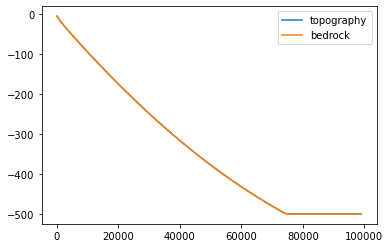

In [12]:
plt.plot(x, eta, label = "topography")
plt.plot(x, etab, label = "bedrock")
# plt.plot(x, H, label = "sediment")
plt.legend()

In [13]:
alpha

array([0.99999543, 0.99999797, 0.99999885, 0.99999926, 0.99999948,
       0.99999961, 0.9999997 , 0.99999976, 0.9999998 , 0.99999984,
       0.99999986, 0.99999988, 0.9999999 , 0.99999991, 0.99999992,
       0.99999993, 0.99999994, 0.99999994, 0.99999995, 0.99999995,
       0.99999996, 0.99999996, 0.99999996, 0.99999997, 0.99999997,
       0.99999997, 0.99999997, 0.99999997, 0.99999998, 0.99999998,
       0.99999998, 0.99999998, 0.99999998, 0.99999998, 0.99999998,
       0.99999998, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99999

In [ ]:
# just for kicks
kb = 8.3e-8
b = (kb * Q[1:] * (S ** (7/6))) / (D**(3/2))
print(b)

In [ ]:
# ok really going out on a limb here...
depth = (0.09801 * D) / S
print(depth)

In [ ]:
depth_list = list(depth)

In [ ]:
depth_list

In [ ]:
plt.plot(x[1:], b, label = 'width')
plt.plot(x[1:], depth, label = 'depth')
plt.ylabel('width or depth (m)')
plt.xlabel('distance (m)')
plt.legend()

In [ ]:
plt.plot(x[1:], S)

In [ ]:
S

In [ ]:
ql

In [ ]:
small_a_dist = 0.02 * x**(2)

In [ ]:
small_a_dist

In [ ]:
x

In [ ]:
small_area = area[23]
small_a_array = np.linspace(0, small_area, len(x))
S_pred_array = ((baselevel_rate * gamma * small_a_array[1:])/(kqs * I * Q[1:]))**(6./7.)

In [ ]:
plt.plot(S_pred_array)
plt.plot(S)

In [ ]:
S_pred_array

In [ ]:
difference = S_pred_array - S
print(difference)

In [ ]:
area[13]

In [ ]:
len(x)

In [ ]:
abrasion_fraction = ((Eb_a_ig[:-1] + Eb_a_sed[:-1])/B_valley[1:])/Eb[:-1]
plucking_fraction = ((Eb_p_ig[:-1] + Eb_p_sed[:-1])/B_valley[1:])/Eb[:-1]

In [ ]:
plt.plot(abrasion_fraction)
#plt.plot(plucking_fraction)

In [ ]:
S_0 = 0.001
prefac = (baselevel_rate * area[1:] * gamma)/(kqs * I * Q[1:] * S_0 * K)
num = K * np.exp(-beta)